<a href="https://colab.research.google.com/github/mlinardi91/PES_UTN/blob/main/Tp1_Python_Linardi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Nº 1

Objetivos:
* Aplicar conceptos de procesamiento de señales en python, como convolución.
* Familiarizarse con el entorno de desarrollo de python notebooks

## Ejercicios
1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz. Analizar los resultados.

3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'), comparar tiempos y error a la salida. (Compararlo con np.convolve). Sacar conclusiones sobre los resultados.
Medir tiempos de computo con el método: timeit de la lib timeit de la siguiente forma:

In [ ]:
%pylab inline
import timeit
import time
import numpy as np

t = np.arange(0, 1024/20000, 1/20000)
s1= np.sin(2*np.pi*1000*t)+1
s2 = np.sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)



Populating the interactive namespace from numpy and matplotlib
0.00026026000000456406
0.0003643035888671875


La diferencia en la medición depende de la carga de la CPU y que el primer método mide solamente la función pedida. Usar uno de los 2 para realizar la medición, como la medición es comparativa, solo importa usar el mismo método para todo, los valores absolutos no importan.

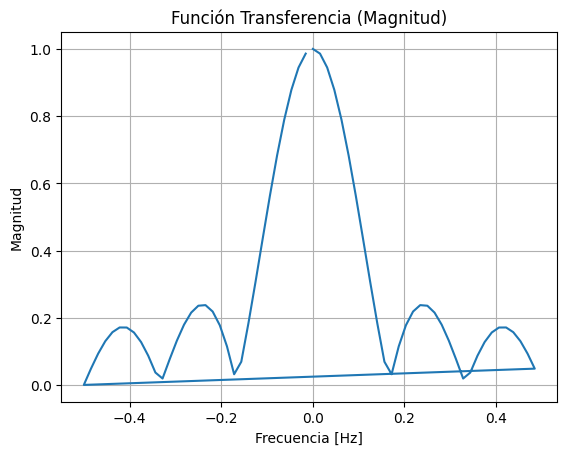

In [ ]:
#1- Encontrar la función de transferencia del moving average. (Para esto deben definir un algoritmo de moving average y extraer su firma/transferencia).

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Defino la señal de entrada (delta de dirac)

Delta_dirac = np.zeros(64)
Delta_dirac[32] = 1

# Defino ventana del filtro moving average y armo el array

MVSIZE = 3
N = 64

avg = np.zeros(N)
for n in range(len(Delta_dirac)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(Delta_dirac))):
            suma = suma + Delta_dirac[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)


# Realizo la convolución en el dominio del tiempo
convolucion = np.convolve(Delta_dirac, avg, mode='same')

# Calculo la FFT de la señal de entrada y salida
Delta_fft = fft(Delta_dirac)
Convolucion_fft = fft(convolucion)
filtro_fft = fft(avg, len(Delta_dirac))  # FFT del filtro ajustada al tamaño de la señal

# Calculo la función de transferencia H(f) = Y(f) / X(f)
funcion_transferencia = Convolucion_fft / Delta_fft

# Muestro los resultados
frequencies = np.fft.fftfreq(len(Delta_dirac))

# Magnitud de la función de transferencia
plt.plot(frequencies, np.abs(funcion_transferencia))
plt.title('Función Transferencia (Magnitud)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid()
plt.show()

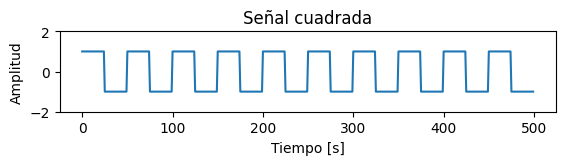

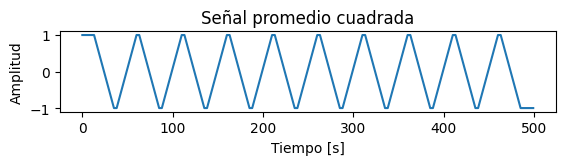

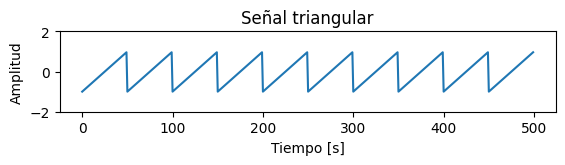

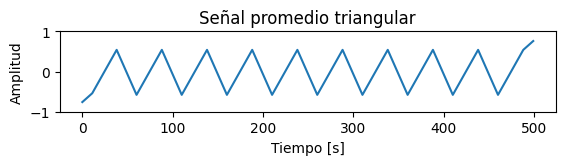

In [ ]:
#2- Inyectar al moving average una cuadrada de amplitud 1 y frecuencia 2KHz y una triangular de amplitud 1 y frecuencia 1KHz.
#   Analizar los resultados.

# Señal cuadrada con scipy
import scipy.signal as sig
import matplotlib.pyplot as plt

#Parámetros de la señal
frec_muestreo = 100000 #en Hz
frec_senial = 2000 # en Hz

t = np.arange(0,0.005,1/frec_muestreo)

#print("t: {}".format(t))
senial_cuadrada = sig.square(2 * np.pi * frec_senial * t)
#print("Señal cuadrada scipy: {}".format(senial_cuadrada_scipy))

plt.subplot(4, 1, 1)
plt.title('Señal cuadrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(senial_cuadrada)
plt.ylim(-2, 2)
plt.show()

MVSIZE = 11

N = len(senial_cuadrada)

avg = np.zeros(N)
for n in range(len(senial_cuadrada)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(senial_cuadrada))):
            suma = suma + senial_cuadrada[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)

#plt.show()
plt.subplot(4, 1, 2)
plt.title('Señal promedio cuadrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(avg)
plt.show()
#print("t:",t)
#print("avg:",avg)


###############################################################################

# Señal triangular
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

#Parámetros de la señal
frec_muestreo_2 = 50000 #en Hz
frec_senial_2 = 1000 # en Hz
t_2 = np.arange(0,0.01,1/frec_muestreo_2)

#print("t: {}".format(t))
senial_triangular= sig.sawtooth(2 * np.pi * frec_senial_2 * t_2)
#print("Señal triangular: {}".format(senial_triangular))

#plt.plot(t, senial_triangular)

plt.subplot(4, 1, 3)
plt.title('Señal triangular')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(senial_triangular)
plt.ylim(-2, 2)
plt.show()

MVSIZE_2 = 11

N = len(senial_triangular)

avg_2 = np.zeros(N)
for n in range(len(senial_triangular)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE_2), MVSIZE_2):
        if ((n-k) > 0) and ((n-k) < (len(senial_triangular))):
            suma = suma + senial_triangular[(n-k)]
            d = d+1
    avg_2[n] = np.copy(suma/d)

#plt.show()
plt.subplot(4, 1, 4)
plt.title('Señal promedio triangular')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(avg_2)
plt.ylim(-1, 1)
plt.show()
#print("t:",t)
#print("avg:",avg)



In [3]:
#3- Realizar un algoritmo de convolución en float y en punto fijo (por ejemplo usando 'fixedpoint'),
#   comparar tiempos y error a la salida. (Compararlo con np.convolve).
#   Sacar conclusiones sobre los resultados.

import numpy as np
import time
!pip install fixedpoint
from fixedpoint import FixedPoint

# Función para convertir float a punto fijo
def arrayFixedPoint(initial_array, qformat):
  # Retorna: un array con los valores de initial_array convertidos
  # a fixed point, de la misma longitud
  # con el formato qformat = {'signed': ?, 'm': ?, 'n': ?}
  fx_array = []
  for num in initial_array:
    fx_num = FixedPoint(num, **qformat)
    fx_array.append(fx_num)
  return fx_array


# Función de convolución en punto flotante
def convolucion_float(x, h):
    n = len(x)
    m = len(h)
    y = [0] * (n + m - 1)
    for i in range(n + m - 1):
        for j in range(m):
            if i - j >= 0 and i - j < n:
                y[i] += x[i - j] * h[j]
    return y

# Función de convolución en punto fijo
def convolucion_pfijo(x, h, frac_bits):
    n = len(x)
    m = len(h)
    y = [FixedPoint(0, signed=True, m=16, n=frac_bits) for _ in range(n + m - 1)]
    for i in range(n + m - 1):
        for j in range(m):
            if i - j >= 0 and i - j < n:
                y[i] += x[i - j] * h[j]
    return [float(v) for v in y]  # Convertimos de nuevo a flotante para la comparación

# Genero dos señales de ejemplo
x = np.random.rand(100)  # Señal de entrada
h = np.random.rand(50)   # Respuesta al impulso

print("vector x:",x)
print("vector h:",h)

# Convolución en punto flotante
start_float = time.time()
resultado_float = convolucion_float(x, h)
end_float = time.time()

# Convolución usando np.convolve
start_np = time.time()
resultado_np = np.convolve(x, h)
end_np = time.time()

# Convierto las señales a punto fijo
qformat = {'signed': True, 'm': 2, 'n': 6}
x_pfijo = arrayFixedPoint(x, qformat)
h_pfijo = arrayFixedPoint(h, qformat)

# Convolución en punto fijo
start_pfijo = time.time()
resultado_pfijo = convolucion_pfijo(x_pfijo, h_pfijo, qformat["n"])
end_pfijo = time.time()

# Cálculo del error medio cuadrático
error_float = np.mean((np.array(resultado_float) - resultado_np) ** 2)
error_pfijo = np.mean((np.array(resultado_pfijo) - resultado_np) ** 2)

# Resultados
print(f"Tiempo convolución float: {end_float - start_float} segundos")
print(f"Tiempo convolución np.convolve: {end_np - start_np} segundos")
print(f"Tiempo convolución punto fijo: {end_pfijo - start_pfijo} segundos")

print(f"Error medio cuadrático convolución float: {error_float}")
print(f"Error medio cuadrático convolución punto fijo: {error_pfijo}")





vector x: [0.54097637 0.42385452 0.4679313  0.33341014 0.39355219 0.93942959
 0.1238457  0.63210345 0.83053592 0.47588024 0.0872166  0.91464927
 0.72005261 0.42285503 0.0410542  0.3544545  0.0698465  0.16474135
 0.65156934 0.58122462 0.83851432 0.77177979 0.80999285 0.01879313
 0.22672846 0.572816   0.38215575 0.47836786 0.75095343 0.68712348
 0.25766603 0.48006217 0.97446945 0.63439589 0.08969735 0.79267447
 0.87522572 0.74335223 0.72769464 0.5039874  0.1309315  0.43600948
 0.00430391 0.12977431 0.63235845 0.93802525 0.38585188 0.01793592
 0.56962869 0.9259356  0.26811214 0.99671117 0.5505888  0.92169575
 0.50849629 0.58774335 0.93375598 0.05659359 0.45595928 0.90000679
 0.71425046 0.51252819 0.27281669 0.37012471 0.40862064 0.84467512
 0.78272969 0.43626381 0.23747782 0.83896957 0.43235453 0.14261817
 0.68505812 0.6433064  0.56057996 0.6600513  0.57178768 0.30995057
 0.75011218 0.51701488 0.22787024 0.70651533 0.92020955 0.82786019
 0.84714746 0.2131279  0.93159646 0.72340007 0.84567